In [2]:
import tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load data

In [2]:
path = "./data/SergioIoppolo-November2023/20231104  hexane/"

In [3]:
bkgd_fname1 = path + "R73861.d01"
sample_fname1 = path + "R73873.d01"

bkgd_fname2 = path + "R73861.d02"
sample_fname2 = path + "R73873.d02"

bkgd_fname3 = path + "R73862.d01"
sample_fname3 = path + "R73874.d01"

bkgd_fname4 = path + "R73862.d02"
sample_fname4 = path + "R73874.d02"

### SingleScan objects

In [4]:
test_scan1 = tools.SingleScan(bkgd_fname1, sample_fname1)
test_scan2 = tools.SingleScan(bkgd_fname2, sample_fname2)
test_scan3 = tools.SingleScan(bkgd_fname3, sample_fname3)
test_scan4 = tools.SingleScan(bkgd_fname4, sample_fname4)

(-0.02, 0.8)

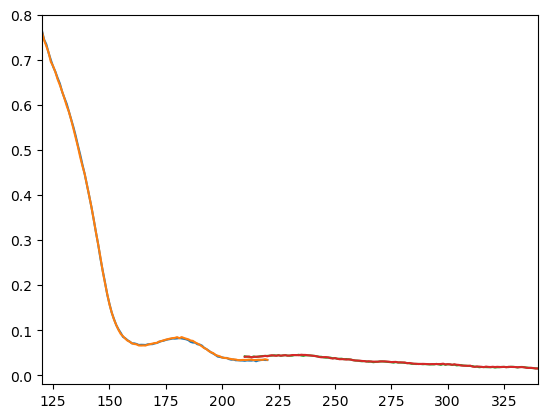

In [5]:
fig, ax = plt.subplots(1, 1)

ax.plot(test_scan1.data['wavelength'], test_scan1.data['absorbance'])
ax.plot(test_scan2.data['wavelength'], test_scan2.data['absorbance'])
ax.plot(test_scan3.data['wavelength'], test_scan3.data['absorbance'])
ax.plot(test_scan4.data['wavelength'], test_scan4.data['absorbance'])

ax.set_xlim(120, 340)
ax.set_ylim(-0.02, 0.8)

### Spectrum objects

In [6]:
bkgd_fname1 = path + "R73861.d01"
sample_fname1 = path + "R73873.d01"

bkgd_fname2 = path + "R73861.d02"
sample_fname2 = path + "R73873.d02"

# action, pressing "ok" in the edit window:

test_spectrum = tools.Spectrum()
test_spectrum.change_name("73873")
test_spectrum.add_bkgd(bkgd_fname1)
test_spectrum.add_bkgd(bkgd_fname2)
test_spectrum.add_sample(sample_fname1)
test_spectrum.add_sample(sample_fname2)
test_spectrum.change_color("#000001")
test_spectrum.change_offset(0.00001)
test_spectrum.average_scans()
#tools.plot_absorbance([test_spectrum])

In [7]:
#test_spectrum.flip_visibility()

In [8]:
test_spectrum.change_color("#FF0000")

/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


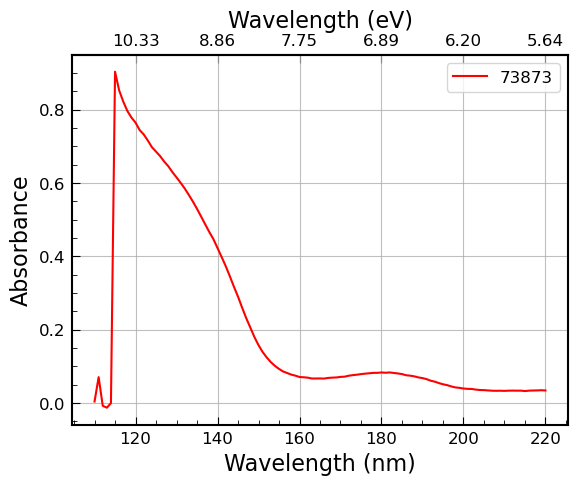

In [9]:
tools.plot_absorbance([test_spectrum])#, xlim=(120, 340), ylim=(-0.02, 0.8))

In [10]:
test_spectrum.data['absorbance']

0      0.003893
1      0.070372
2     -0.007720
3     -0.012925
4     -0.000565
         ...   
106    0.033585
107    0.033956
108    0.034200
109    0.034710
110    0.034000
Name: absorbance, Length: 111, dtype: float64

In [11]:
bkgd_fname1 = path + "R73861.d01"
sample_fname1 = path + "R73873.d01"

bkgd_fname2 = path + "R73861.d02"
sample_fname2 = path + "R73873.d02"

# action, pressing "ok" in the edit window:

spec1 = tools.Spectrum()
spec1.change_name("73873")
spec1.add_bkgd(bkgd_fname1)
spec1.add_bkgd(bkgd_fname2)
spec1.add_sample(sample_fname1)
spec1.add_sample(sample_fname2)
spec1.change_color("#000001")
spec1.change_offset(0.0)
spec1.average_scans()
#tools.plot_absorbance([test_spectrum])


bkgd_fname1 = path + "R73862.d01"
sample_fname1 = path + "R73874.d01"

bkgd_fname2 = path + "R73862.d02"
sample_fname2 = path + "R73874.d02"

# action, pressing "ok" in the edit window:

spec2 = tools.Spectrum()
spec2.change_name("73874")
spec2.add_bkgd(bkgd_fname1)
spec2.add_bkgd(bkgd_fname2)
spec2.add_sample(sample_fname1)
spec2.add_sample(sample_fname2)
spec2.change_color("#000001")
spec2.change_offset(0.0)
spec2.average_scans()
#tools.plot_absorbance([test_spectrum])

/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


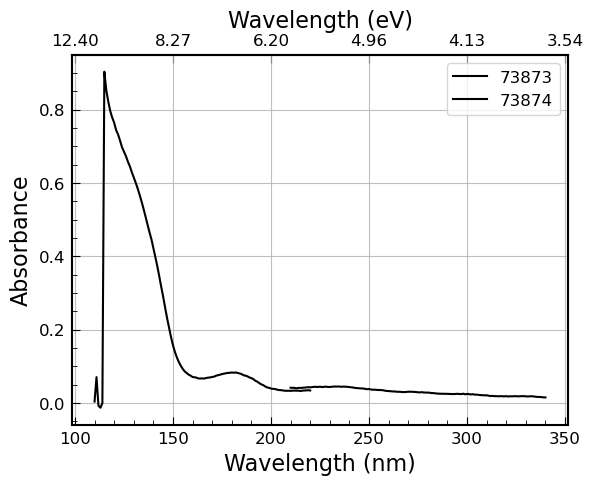

In [12]:
tools.plot_absorbance([spec1, spec2])

In [13]:
tester = tools.StichedSpectrum(spec1, spec2)

/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


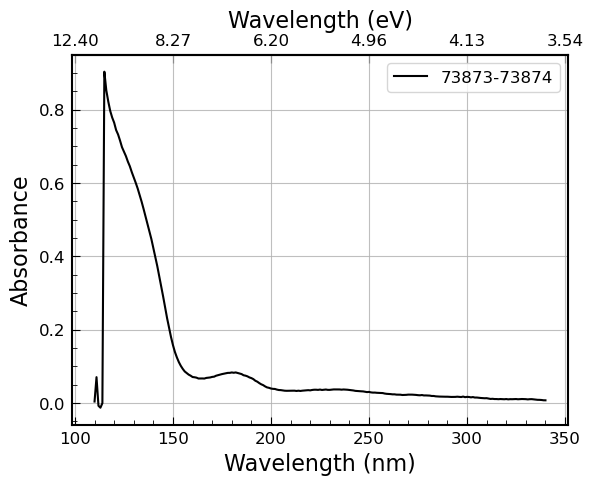

In [14]:
tools.plot_absorbance([tester])

In [15]:
tester.save_to_csv("./hexane_irradiation_1.csv")

/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


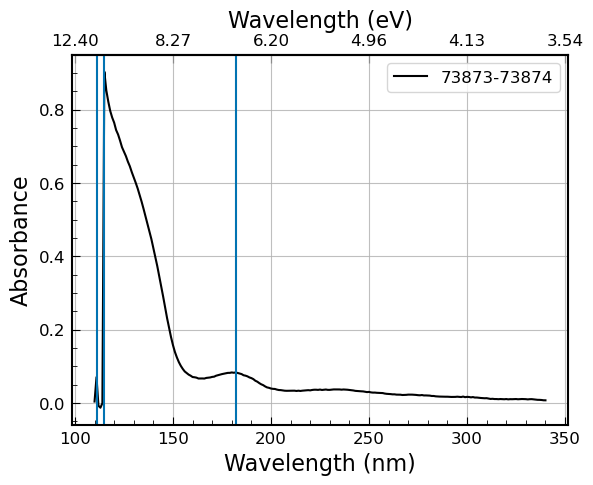

In [16]:
# note, this is not the most robust way to find the peaks.
# What you should do when you implement this, is fit the function
# with several asymmetric gaussians (must be asymmetric or it won't work)
# and then take the peaks of those gaussians. This is much more robust
# against noise, which in general might be high.

from scipy.signal import find_peaks
peaki = find_peaks(tester.data['absorbance'], prominence=0.005)
peaks = []
for i in peaki[0]:
    this_wl = tester.data['wavelength'][i]
    this_ab = tester.data['absorbance'][i]
    peaks.append([this_wl, this_ab])
    
tools.plot_absorbance([tester], peaks=peaks)

## Have a look at the oxy data why not

In [1]:
import tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = './data/AlessandraMigliorini-October2023/DATA_Oct2023/20231024    O2_CH3OH   Layer  VIS OK/'

In [2]:
spec = tools.Spectrum()
spec.change_name("73666")
spec.add_bkgd(path + "R73661.d01")
spec.add_bkgd(path + "R73661.d02")
spec.add_bkgd(path + "R73661.d03")
spec.add_bkgd(path + "R73661.d04")
spec.add_sample(path + "R73666.d01")
spec.add_sample(path + "R73666.d02")
spec.add_sample(path + "R73666.d03")
spec.add_sample(path + "R73666.d04")
spec.change_color("#000001")
spec.change_offset(0.0)
spec.average_scans()

/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


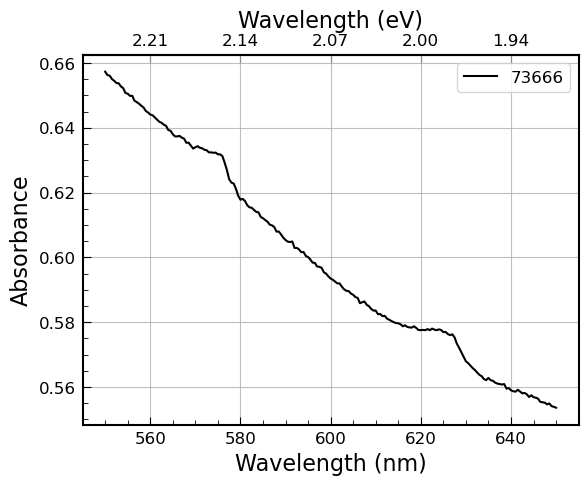

In [3]:
tools.plot_absorbance([spec])

/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


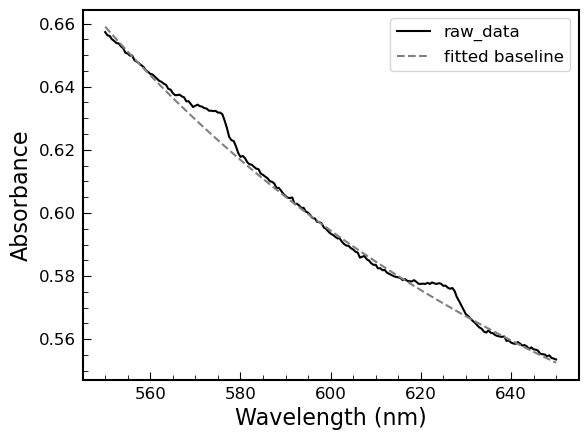

In [8]:
spec.subtract_baseline([(550, 565), (585, 610), (635, 650)],
                       p0=[10**9, 0.5, 1])

fig, ax = plt.subplots(1, 1)
ax.plot(spec.data['wavelength'], spec.data['raw_absorbance'],
        color='black', label='raw_data')
ax.plot(spec.data['wavelength'], spec.data['baseline'],
        color='grey', label='fitted baseline', linestyle = '--')
ax.legend()
ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Absorbance");

In [5]:
spec.baseline_p

array([5.67446133e+09, 4.44151953e-01, 3.35606487e+00])

/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


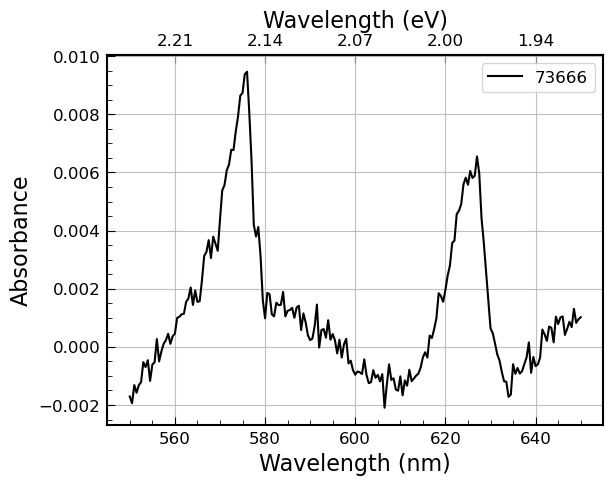

In [9]:
tools.plot_absorbance([spec])

### Have a try fitting the UV data

/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


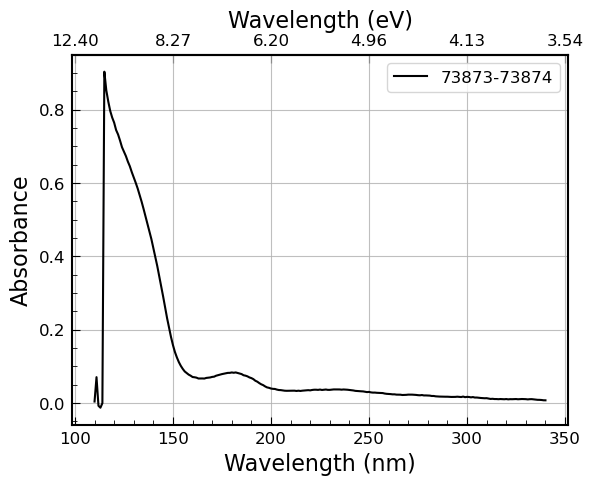

In [10]:
path = "./data/SergioIoppolo-November2023/20231104  hexane/"
bkgd_fname1 = path + "R73861.d01"
sample_fname1 = path + "R73873.d01"

bkgd_fname2 = path + "R73861.d02"
sample_fname2 = path + "R73873.d02"

# action, pressing "ok" in the edit window:

spec1 = tools.Spectrum()
spec1.change_name("73873")
spec1.add_bkgd(bkgd_fname1)
spec1.add_bkgd(bkgd_fname2)
spec1.add_sample(sample_fname1)
spec1.add_sample(sample_fname2)
spec1.change_color("#000001")
spec1.change_offset(0.0)
spec1.average_scans()
#tools.plot_absorbance([test_spectrum])


bkgd_fname1 = path + "R73862.d01"
sample_fname1 = path + "R73874.d01"

bkgd_fname2 = path + "R73862.d02"
sample_fname2 = path + "R73874.d02"

# action, pressing "ok" in the edit window:

spec2 = tools.Spectrum()
spec2.change_name("73874")
spec2.add_bkgd(bkgd_fname1)
spec2.add_bkgd(bkgd_fname2)
spec2.add_sample(sample_fname1)
spec2.add_sample(sample_fname2)
spec2.change_color("#000001")
spec2.change_offset(0.0)
spec2.average_scans()
#tools.plot_absorbance([test_spectrum])

tester = tools.StichedSpectrum(spec1, spec2)

tools.plot_absorbance([tester])

/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


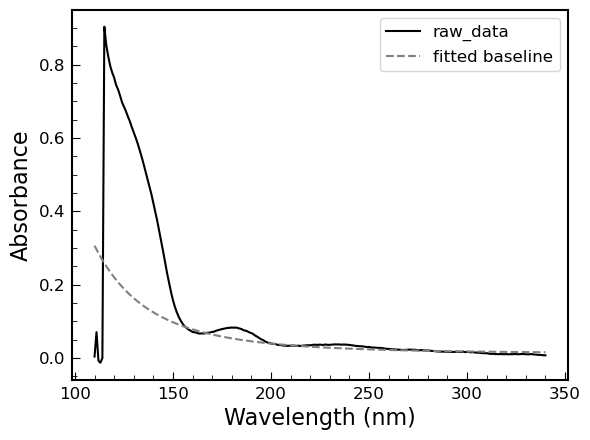

In [72]:
# selecting the right region to fit in makes a huge difference here!!!
tester.subtract_baseline([(157, 165), (190, 210), (250, 270),
                          (280, 290), (315, 320), (330, 340)],
                         p0=[10**0, 0, 0])

fig, ax = plt.subplots(1, 1)
ax.plot(tester.data['wavelength'], tester.data['raw_absorbance'],
        color='black', label='raw_data')
ax.plot(tester.data['wavelength'], tester.data['baseline'],
        color='grey', label='fitted baseline', linestyle = '--')
ax.legend()
ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Absorbance");

In [73]:
tester.baseline_p

array([1.01111966e+00, 1.23738238e-02, 4.25339584e+07])

/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


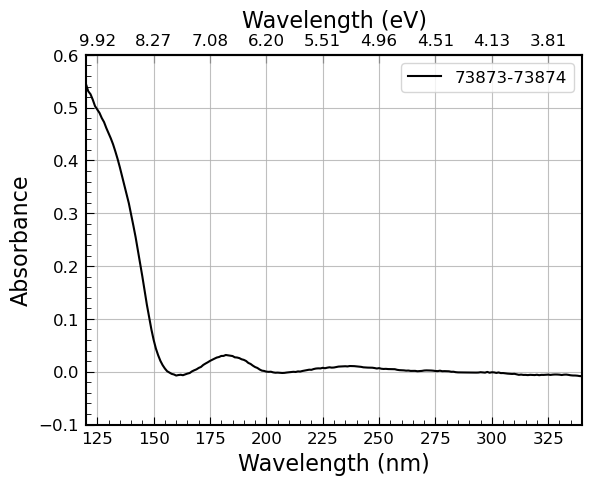

In [78]:
tools.plot_absorbance([tester], xlim=[120, 340], ylim=[-0.1, 0.6])

/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


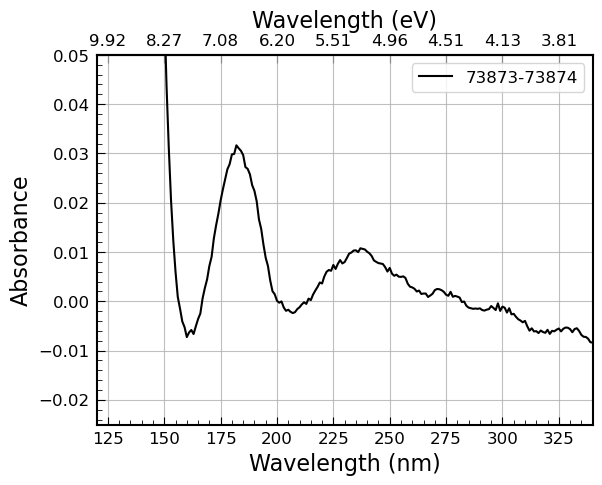

In [82]:
tools.plot_absorbance([tester], xlim=[120, 340], ylim=[-0.025, 0.05])

In [1]:
import gaussians
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('./au-uv.mplstyle')

In [2]:
x = np.linspace(-20, 20, 400)
y1 = gaussians.g1(x, 1,0,2)
y2 = gaussians.g2(x, 2,-4,2, 1,3,2)
y3 = gaussians.g3(x, 2,-4,2, 1,2,2, 0.5,8,2)
y4 = gaussians.g4(x, 2,-4,2, 1,2,2, 0.5,8,2, 1,5,2)

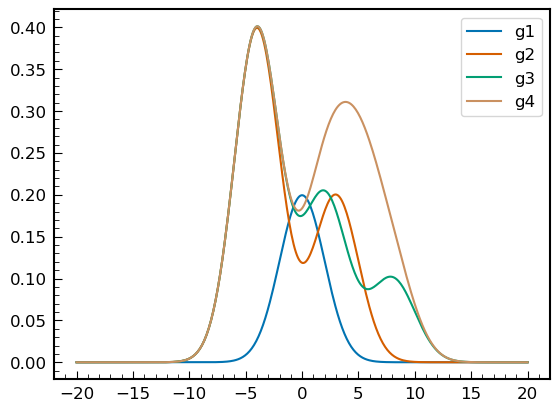

In [3]:
fig, ax = plt.subplots(1, 1)

ax.plot(x, y1, label="g1")
ax.plot(x, y2, label="g2")
ax.plot(x, y3, label="g3")
ax.plot(x, y4, label="g4")

ax.legend()